## Student Performance Indicator

Life cycle of Machine learning Project
-  Understanding the Problem Statement
-  Data Collection
-  Data Checks to perform
-  Exploratory data analysis
-  Data Pre-Processing
-  Model Training
-  Choose best model

1). Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2). Data Collection
-  Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages


Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as pandas Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

show top 5 record

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Dataset

In [4]:
df.shape

(1000, 8)

2.2. Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# 3.  Data Checks to perform

- Check Missing Value
- Check Duplicate Value
- Check Data Type
- Check the number of Unique value of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1. Check Missing Value

In [5]:
df.isna().sum()
# df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in this dataset

3.2. Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicated values in the data set

3.3. Check DataType

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4. Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5. Check the statistics of the data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.6. Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in gender variable:       ", end = " ")
print(df['gender'].unique())

print("Categories in race / ethnicity:      ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in Parental level of education:       ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch:       ", end = " ")
print(df['lunch'].unique())

print("Categories in test preparation course:       ", end = " ")
print(df['test_preparation_course'].unique())

Categories in gender variable:        ['female' 'male']
Categories in race / ethnicity:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental level of education:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:        ['standard' 'free/reduced']
Categories in test preparation course:        ['none' 'completed']


In [12]:
#Define numerical and categorical columns
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical feature :{}'.format(len(numeric_feature), numeric_feature))
print('we have {} categorical feature :{}'.format(len(categorical_feature), categorical_feature))

we have 3 numerical feature :['math_score', 'reading_score', 'writing_score']
we have 5 categorical feature :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding column for Total and Average score

In [13]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['Total_Score'] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'number of students with full marks in Maths: {math_full}')
print(f'number of students with full marks in reading: {reading_full}')
print(f'number of students with full marks in writing: {writing_full}')

number of students with full marks in Maths: 7
number of students with full marks in reading: 17
number of students with full marks in writing: 14


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()
math_less_20 = df[df['math_score'] <= 20]['math_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


Insights

- from the above values we get students have performed the worst in Maths
- Best prformance in reading section

# 4. Exploring Data (Visualization)

4.1. Visualize average score distribution to make some conclusion.

- Histogram
- KDF (Kernal Distribution Function)

4.1.1. Histogram & KDF

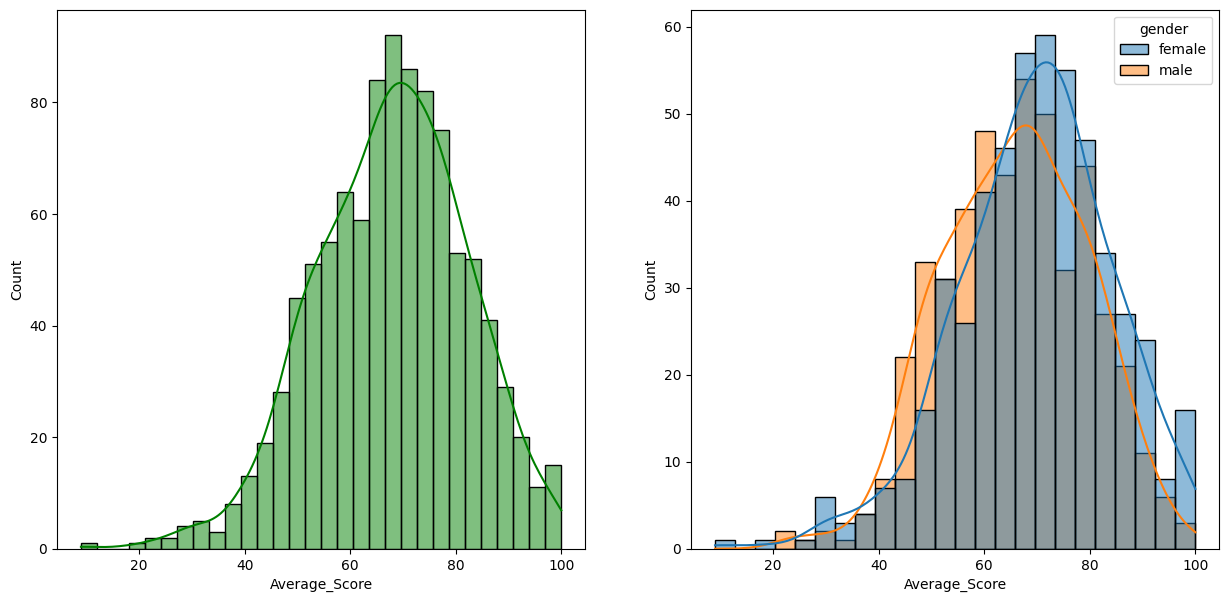

In [23]:
fig, axs = plt.subplots(1, 2, figsize =(15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average_Score', bins = 30, kde=1, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Average_Score', kde = 1, hue = 'gender')
plt.show()